* @Author : Pramil Paudel, Sumit Bhattarai
* Development Env : Jupyter Lab
* Module : Severity Analysis and Forecasting 
* Summary : This module will perform Severity Analysis using EDA and finally prepare data for time series forcasting using ARIMA and fbprophet. 

In [1463]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.display import Image
import pydotplus
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from fbprophet import Prophet
print("Loaded Successfully -- -- -- -- -- -- -- -- -- -- -- -- --")

Loaded Successfully -- -- -- -- -- -- -- -- -- -- -- -- --


#### Defining input/output directory

In [1464]:
input_path = "../../data/raw/"
output_path = "../../data/pre_processing/"
image_path = "../../figures/"

#### Load dataset as Dataframe

In [1465]:
df = pd.read_csv(input_path+"US_Accidents_June20.csv", parse_dates=['Start_Time','End_Time'])
df.head()
df.tail()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day
3513616,A-3513780,Bing,NaN,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,...,False,False,False,False,False,False,Day,Day,Day,Day


### Check basic statistics

In [1466]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


### Check Datatype of the columns.

In [1467]:
df.dtypes

ID                               object
Source                           object
TMC                             float64
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64


### Check NaN values

In [1468]:
df.isna().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

## Timeseries Forecasting

### Data Preparation
Data is prepared by taking the count for each day from 2016 to 2019. It will have two columns, date and number of accident.

In [1534]:
df_2019 = df[df['Year'] <= 2019]
df_2019['Date'] = df_2019['Start_Time'].dt.date

In [1535]:
df_ts = df_2019.groupby('Date')['ID'].agg(len).to_frame().reset_index().rename(columns = {'ID': 'Count'})

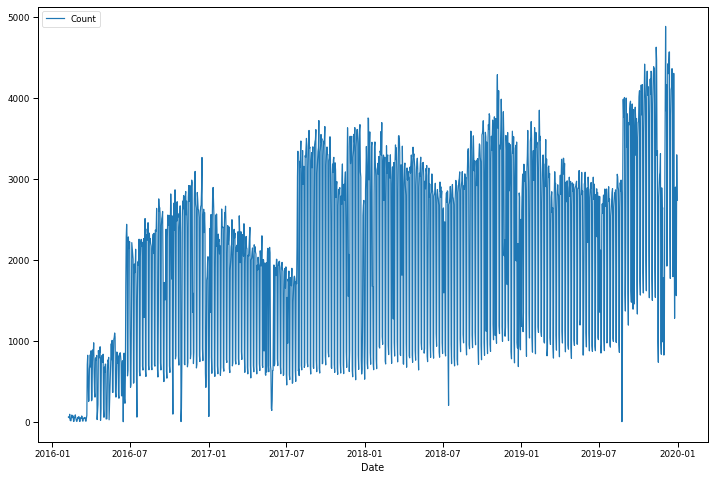

In [1536]:
df_ts.set_index('Date', inplace = True)
df_ts.plot(figsize = (12,8)).get_figure().savefig(f'{image_path}ts1.jpeg')

### Moving average to visualize the trend

In [1537]:
df_ts = df_ts.reset_index()
df_ts.Date = pd.to_datetime(df_ts.Date)
df_ts.set_index('Date', inplace = True)

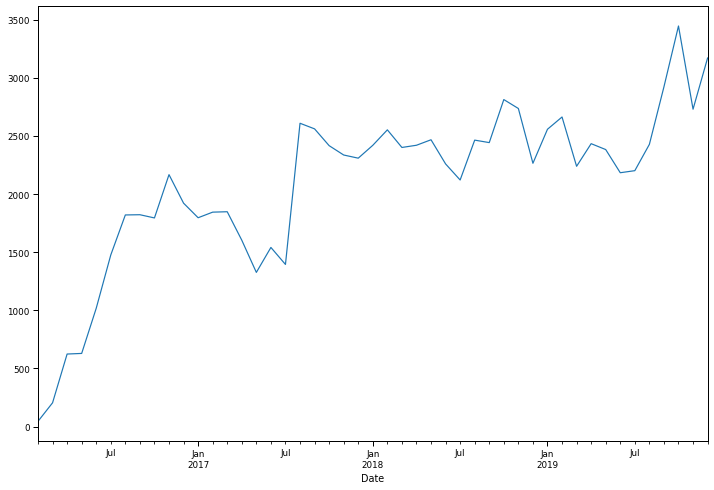

In [1538]:
df_ts = df_ts['Count'].resample('MS').mean()
df_ts.plot(figsize = (12,8)).get_figure().savefig(f'{image_path}ts_ma.jpeg')

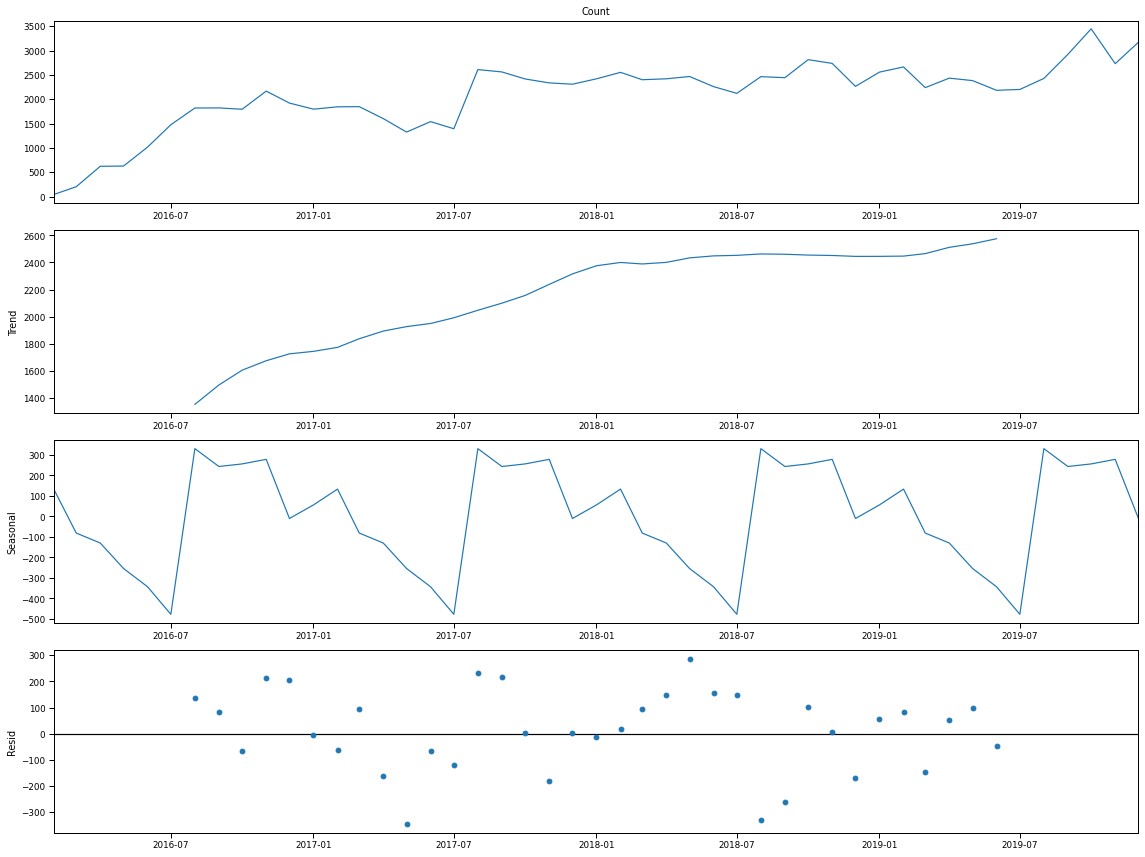

In [1539]:
rcParams['figure.figsize'] = 16, 12
decomposition = sm.tsa.seasonal_decompose(df_ts, model='additive')
fig = decomposition.plot()
plt.show()

* The trend is increasing.
* The seasonal plot shows that the accident increases sharply in August, and starts decreasing from around Feb till July.

## ARIMA


### Evaluate ARIMA Model
I will first split the data set into 70%(first 70%) train and 30% test. Then, train the ARIMA model to compute the error score for the prediction. After creating and evalute model, I will iterate through the value of p,d and q to find the best ARIMA parameters.

In [1509]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X)*0.70)
    train, test = X[0:train_size], X[train_size:len(X)]
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit(disp = 0)
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        history.append(test[i])
    error = mean_squared_error(test, predictions)
    print('order: ',arima_order,'error: ', error)
    return error      

In [1510]:
def find_ARIMA_params (X, p_orders, d_orders, q_orders):
    best_score, best_conf = float('inf'), None
    for p in p_orders:
        for d in d_orders:
            for q in q_orders:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(X, order)
                    if mse < best_score:
                        best_score = mse
                        best_conf = order
                except:
                    continue
    print(f'Best Score: {best_score} best_order: {best_conf}')
    return best_score, best_conf            

In [1511]:
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)
warnings.filterwarnings("ignore")
best_score, best_order = find_ARIMA_params (df_ts.values,p,d,q)

order:  (0, 0, 0) error:  553479.1475567138
order:  (0, 0, 1) error:  287299.5657950613
order:  (0, 0, 2) error:  265690.077543683
order:  (0, 1, 0) error:  134815.07382281928
order:  (0, 1, 1) error:  132315.356899116
order:  (0, 1, 2) error:  136149.6513278566
order:  (0, 2, 0) error:  335723.0891262095
order:  (0, 2, 1) error:  149790.0086389629
order:  (0, 2, 2) error:  151015.87355619873
order:  (1, 0, 0) error:  138725.8273762071
order:  (1, 0, 1) error:  143053.26877239023
order:  (1, 0, 2) error:  256920.85444241826
order:  (1, 1, 0) error:  132772.646110328
order:  (1, 2, 0) error:  243592.58304519558
order:  (1, 2, 1) error:  150716.58533692095
order:  (1, 2, 2) error:  149231.51258205326
order:  (2, 0, 0) error:  143583.07579097585
order:  (2, 0, 1) error:  134286.7070002843
order:  (2, 0, 2) error:  136176.78181608627
order:  (2, 1, 0) error:  135119.841026187
order:  (2, 1, 1) error:  132028.58155608416
order:  (2, 2, 0) error:  184135.71071176353
order:  (2, 2, 1) error: 

* The best order is (2,1,1). We will use this order to find the result of the model.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   46
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -328.773
Method:                       css-mle   S.D. of innovations            301.797
Date:                Mon, 23 Nov 2020   AIC                            667.546
Time:                        14:53:05   BIC                            676.689
Sample:                             1   HQIC                           670.971
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.3009     15.002      3.486      0.000      22.897      81.705
ar.L1.D.y      0.7624      0.151      5.046      0.000       0.466       1.059
ar.L2.D.y      0.0526      0.161      0.325      0.7

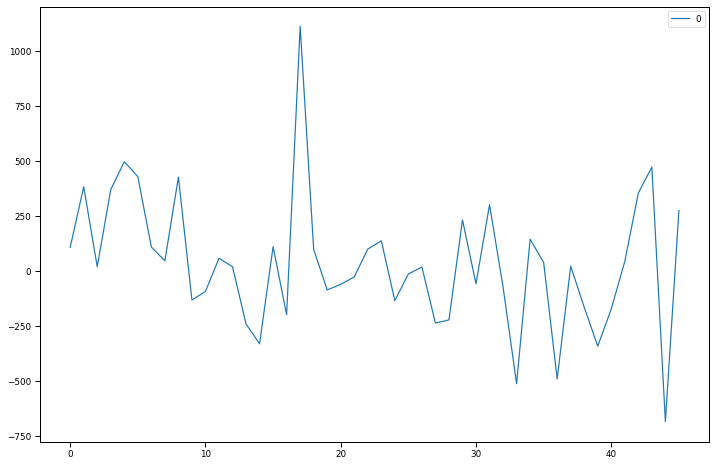

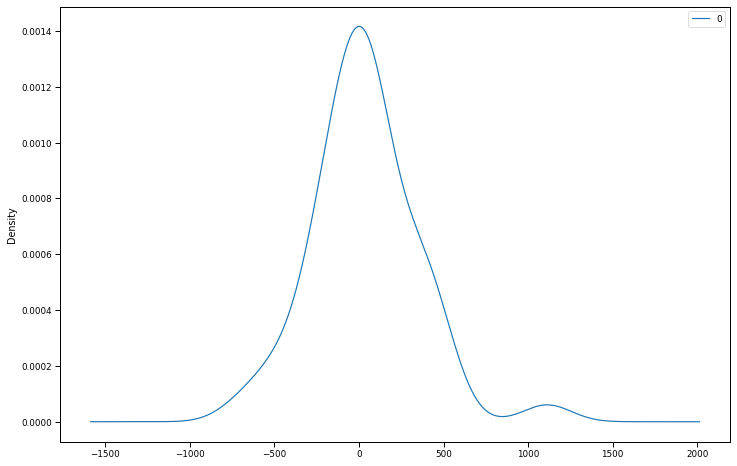

                 0
count    46.000000
mean     35.472080
std     308.603005
min    -686.874656
25%    -134.819542
50%      20.236870
75%     142.448477
max    1113.292750


In [1512]:
model = ARIMA(df_ts.values, order = (2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize = (12,8))
plt.show()
residuals.plot(figsize = (12,8), kind='kde')
plt.show()
print(residuals.describe())

* The dense plot shows that the distribution curve is centered near to 0.

# Rolling forecast ARIMA model
I will be using the order obtained(2,1,1) after iteration to make the prediction and later compare the plot of the expected value and predicted value.

In [1513]:
train_size = int(len(df_ts) * 0.70)
train, test = df_ts[0:train_size], df_ts[train_size:len(df_ts)]
history = [x for x in train]
predictions = [x for x in test]
for i in range(len(test)):
    model = ARIMA(history, order = (2,1,0))
    model_fit = model.fit(disp = 0)
    pred = model_fit.forecast()[0]
    predictions[i] = pred[0]
    history.append(test[i])
    print(f'expected: {test[i]}, predicted: {pred}')

expected: 2812.7419354838707, predicted: [2532.12248617]
expected: 2735.9333333333334, predicted: [2877.75079638]
expected: 2264.6774193548385, predicted: [2846.44260013]
expected: 2557.2903225806454, predicted: [2354.34848111]
expected: 2662.8214285714284, predicted: [2618.69644105]
expected: 2238.7419354838707, predicted: [2727.59611266]
expected: 2433.366666666667, predicted: [2337.39987217]
expected: 2382.7096774193546, predicted: [2510.90877816]
expected: 2183.366666666667, predicted: [2447.92375639]
expected: 2201.0967741935483, predicted: [2266.35664353]
expected: 2427.2903225806454, predicted: [2268.79428527]
expected: 2921.9666666666667, predicted: [2469.1994524]
expected: 3445.7096774193546, predicted: [2946.52197494]
expected: 2729.8, predicted: [3503.97485906]
expected: 3170.3548387096776, predicted: [2811.42803367]


In [1514]:
x = test.reset_index()

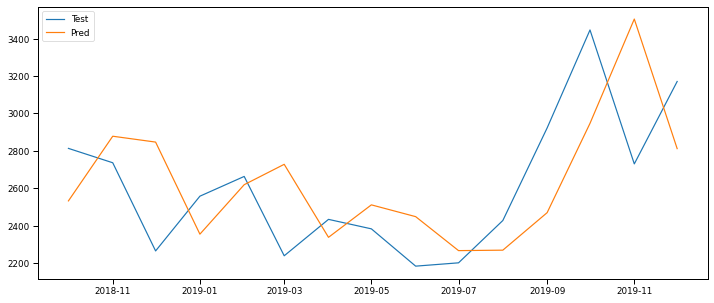

In [1515]:
rcParams['figure.figsize'] = 12, 5
plt.plot(x.Date, x.Count, label = 'Test')
plt.plot(x.Date, predictions, label = 'Pred')
plt.legend(loc="upper left")

* Prediction plot is shifted to the right by one step. This indicates that the forecasted value is close to the current value.

### SARIMA Model

The parameters for SARIMA model are found using grid search method with lowest AIC value.

In [1540]:
import itertools
#set parameter range
p = range(0,3)
q = range(1,3)
d = range(1,2)
s = range(7,8)
aic = float('inf')
n_order = None
s_order = None
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            if(results.aic < aic):
                n_order = param
                s_order = param_seasonal
                aic = results.aic
#             print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('SARIMA{},{} - AIC:{}'.format(n_order, s_order, results.aic))

Optimization terminated successfully.
         Current function value: 5.424812
         Iterations: 4
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 5.363982
         Iterations: 4
         Function evaluations: 187
Optimization terminated successfully.
         Current function value: 5.368904
         Iterations: 7
         Function evaluations: 342
Optimization terminated successfully.
         Current function value: 5.374305
         Iterations: 5
         Function evaluations: 299
Optimization terminated successfully.
         Current function value: 5.364890
         Iterations: 5
         Function evaluations: 290
Optimization terminated successfully.
         Current function value: 5.365724
         Iterations: 5
         Function evaluations: 346
Optimization terminated successfully.
         Current function value: 5.424903
         Iterations: 4
         Function evaluations: 185
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 6.046264
         Iterations: 3
         Function evaluations: 140
                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood                -284.174
Date:                                Mon, 23 Nov 2020   AIC                            576.349
Time:                                        15:14:30   BIC                            583.003
Sample:                                             0   HQIC                           578.736
                                                 - 47                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

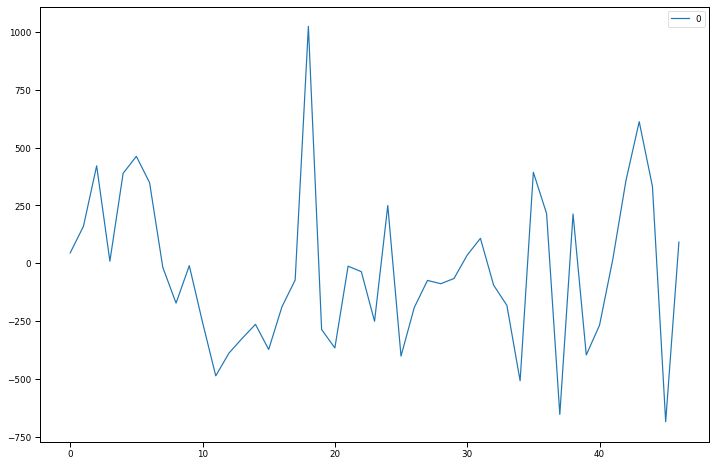

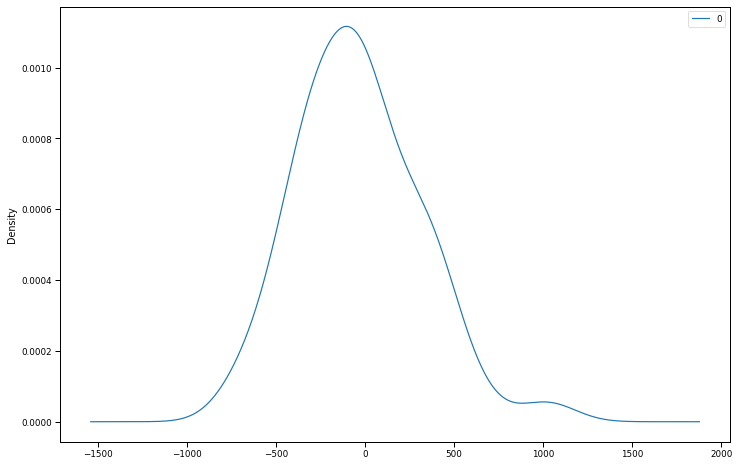

                 0
count    47.000000
mean    -34.540122
std     341.929694
min    -684.437487
25%    -265.633722
50%     -65.865985
75%     186.319659
max    1023.548850


In [1541]:
model_sarimax_fit = SARIMAX(df_ts.values, order=(0,1,1), seasonal_order=(0,1,2,7)).fit(max_iter = 50,method = 'powell')
print(model_sarimax_fit.summary())
residuals_s = pd.DataFrame(model_sarimax_fit.resid)
residuals_s.plot(figsize = (12,8))
plt.show()
residuals_s.plot(figsize = (12,8), kind='kde')
plt.show()
print(residuals_s.describe())

In [1542]:
train_size = int(len(df_ts)*0.70)
train, test = df_ts[0:train_size], df_ts[train_size:len(df_ts)]
history = [x for x in train]
model_sarimax_fit = SARIMAX(df_ts.values, order=(0,1,2), seasonal_order=(0,1,2,7)).fit(max_iter = 50,method = 'powell')
predictions_sarima = model_sarimax_fit.get_forecast(steps = len(test))
predictions_sarima.summary_frame()


Optimization terminated successfully.
         Current function value: 6.034313
         Iterations: 4
         Function evaluations: 234


y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,3301.060942,319.413739,2675.021517,3927.100366
1,3162.197368,444.885321,2290.238161,4034.156574
2,3109.953671,509.872488,2110.621957,4109.285384
3,3035.873670,567.347668,1923.892673,4147.854667
4,3112.521821,619.514275,1898.296155,4326.747488
5,3170.573831,667.619177,1862.064289,4479.083374
6,3396.794062,712.484127,2000.350833,4793.237291
7,3342.566624,750.441501,1871.728309,4813.404938
8,3226.156469,786.706987,1684.239107,4768.073831
9,3286.499661,822.098132,1675.216930,4897.782393


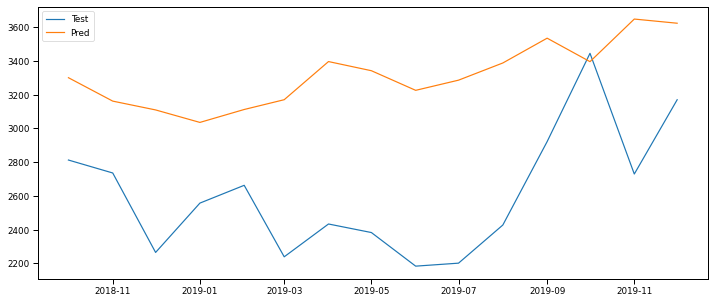

In [1543]:
rcParams['figure.figsize'] = 12, 5
plt.plot(x.Date, x.Count, label = 'Test')
plt.plot(x.Date, predictions_sarima.predicted_mean, label = 'Pred')
plt.legend(loc="upper left")

* The predicted values are much higher than the expected/original values.

## Facebook Prophet
Here, facebook prophet will be used to forecast the accident for 6 month of 2020. Prophet automatically add the yhat(forecast) value for the provided dataframe to. 

In [1520]:
df_ts = df_ts.reset_index()

In [1521]:
df_ts.rename(columns = {'Date': 'ds', 'Count': 'y'}, inplace = True)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


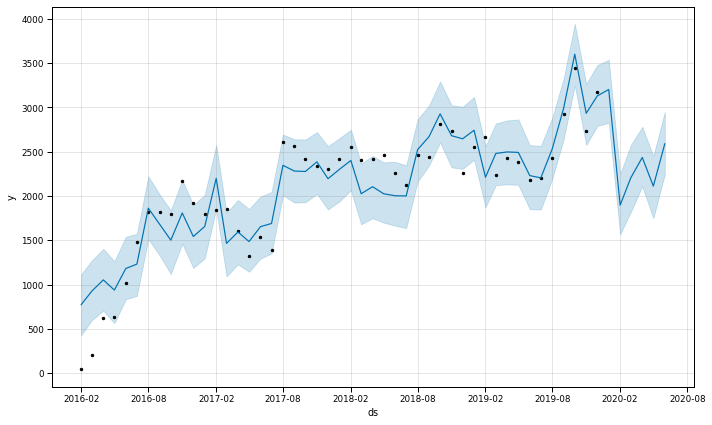

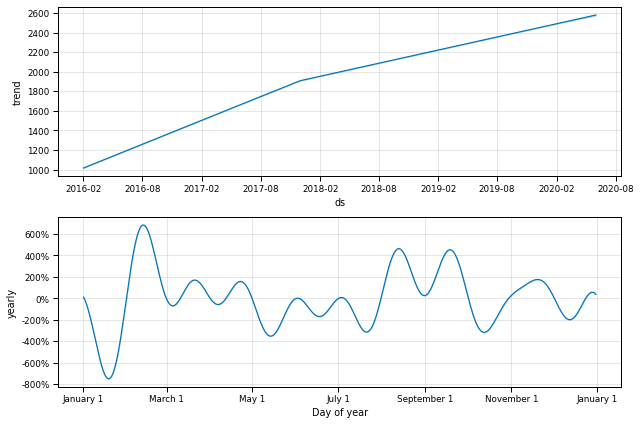

In [1522]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df_ts)
future = model.make_future_dataframe(periods=6, freq='MS')
fcst = model.predict(future)
fig = model.plot(fcst)
fig2 = model.plot_components(fcst)

In [1523]:
df['Date'] = df.Start_Time.dt.date

In [1524]:
df_fb_ts = df.groupby('Date')['ID'].agg(len).to_frame().reset_index().rename(columns = {'ID': 'Count'})

In [1525]:
df_fb_ts.Date = pd.to_datetime(df_fb_ts.Date)
df_fb_ts.set_index('Date', inplace = True)

In [1526]:
df_fb_ts = df_fb_ts['Count'].resample('MS').mean()

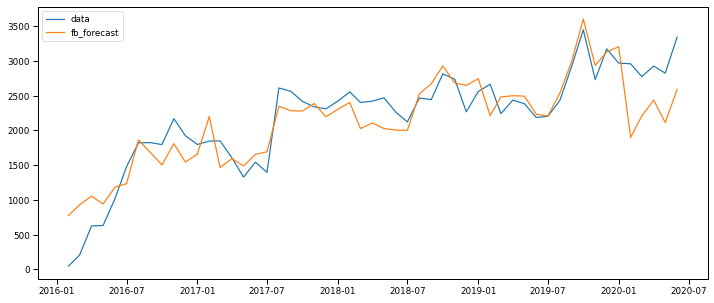

In [1527]:
fcst_ts = fcst.yhat
rcParams['figure.figsize'] = 12, 5
x_2020 = df_fb_ts.reset_index()
plt.plot(x_2020.Date, x_2020.Count, label = 'data')
plt.plot(x_2020.Date,fcst_ts, label = 'fb_forecast')
plt.legend(loc="upper left")

* The plot shows that the forcasted value follows the train data
* For the six month of 2020(not used in train data), it is much more less than that of the test values. 


## Conclusion:

Although the values predicted by prophet is less than the actual values, it seems to follow the pattern. ARIMA model has shifted the predicted value by one step/month, so some performance tuning might help it make better and SARIMAX model has predicted value which is higher that the expected value preserving some pattern of the test plot. So, for this dataset it seems fbprophet seems to work better.